# Derivatives
19/09/2022 by LimBus

$y=x^2 \Longrightarrow \frac{dy}{dx}|_{x=1} = ?$

In [ ]:
def f(x):
  return x**2
def df(x):
  return 2*x

x = 1
f(x), df(x)

In [ ]:
import torch
X = torch.arange(1,10, dtype=torch.float)
X, f(X), df(X)

In [ ]:
class MyFunction:
  @staticmethod
  def __call__(x):
    return x**2
  
  @staticmethod
  def diff(x):
    return 2*x

f = MyFunction()
X = torch.arange(1,10, dtype=torch.float)
X, f(X), f.diff(X)

# torch.autograd

> AUTOGRAD = Automatic Differentiation

In [ ]:
from torch.autograd import grad
import torch.nn.functional as F

## ``.grad``

In [ ]:
# f(x) = x, x = 3
x = torch.tensor([3.], requires_grad=True)

# f'(x) = 1, f'(3) = ?
g = grad(x,x, retain_graph=False)
print('f\'(3) = ', g[0].item())

In [ ]:
x = torch.tensor([3.], requires_grad=True)

# f(x) = x * x
y = x*x
print(grad(y,x, retain_graph=False))

Computation Graph Recap

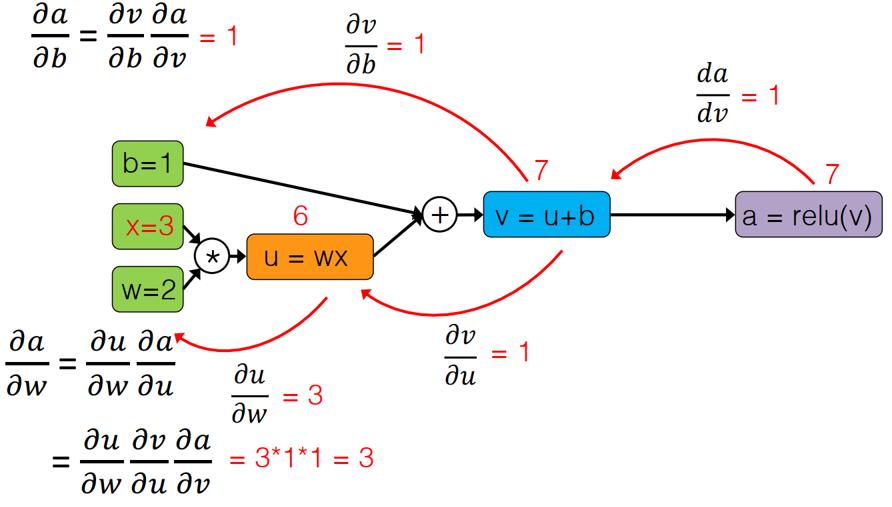

In [ ]:
x = torch.tensor([3.])
w = torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)
a = F.relu(x*w + b)
a

In [ ]:
print(a.grad_fn)

In [ ]:
grad(a, w, retain_graph=True) # Keep graph in memory

In [ ]:
grad(a, b)

In [ ]:
x = torch.tensor([3.])
w = torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

def my_relu(z):
    if z > 0.:
        return z
    else:
        z[:] = 0.
        return z

a = my_relu(x*w + b)
grad(a, w)

In [ ]:
x = torch.tensor([-1.])
w = torch.tensor([1.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)
a = F.relu(x*w + b)
grad(a, w, retain_graph=False)

## ``.requires_grad`` and ``.retain_graph``

In [ ]:
?torch.is_grad_enabled

In [ ]:
# from above example

x = torch.tensor([3.])
w = torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)
a = F.relu(x*w + b)

print("da/dw = {}".format(grad(a, w, retain_graph=True)[0].item()))
print("da/db = {}".format(grad(a, b, retain_graph=True)[0].item()))
print("da/dx = {}".format(grad(a, x)[0].item()))

In [ ]:
x = torch.tensor([3.], requires_grad=True)
w = torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

u = x * w
v = u + b
a = F.relu(v)

d_a_b = grad(a, b, retain_graph=True)
d_a_u = grad(a, u, retain_graph=True)
d_a_v = grad(a, v, retain_graph=True)
d_a_w = grad(a, w, retain_graph=True)
d_a_x = grad(a, x)

for name, _ in zip("xwbuv", (d_a_x, d_a_w, d_a_b, d_a_u, d_a_v)):
    print('da/d%s = ' %name, _[0].item())

In [ ]:
x = torch.tensor([3.], requires_grad=True)
w = torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

u = x * w
v = u + b
a = F.relu(v)

partial_derivatives = grad(a, (x, w, b, u, v))

for name, _ in zip("xwbuv", (partial_derivatives)):
    print('da/d%s = ' %name, _[0].item())

## ``.detach`` and ``.zero_``

In [ ]:
torch.manual_seed(1)
x = torch.randn(3,3,requires_grad=True)
x

In [ ]:
y = x.detach()
y, y.requires_grad

In [ ]:
y.zero_()
print(y, y.requires_grad)
print(x)

In [ ]:
y = x.clone().detach()
y, y.requires_grad

In [ ]:
y.zero_()
print(y, y.requires_grad)
print(x)

## ``.backward`` and ``retain_grad``

Note that ``retain_grad=False`` in default

In [ ]:
# Example: .backward()

x = torch.tensor([3.], requires_grad=True)
w = torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)
# print(x.is_leaf, w.is_leaf, b.is_leaf)

u = x * w
v = u + b
a = F.relu(v)

# u.retain_grad()
# v.retain_grad()

a.backward()

In [ ]:
for name, var in zip("xwbuv", (x, w, b, u, v)):
    print('da/d%s = ' % name, var.grad)

In [ ]:
# Practice: See the following example. Explain the results

x = torch.ones(2, 2, requires_grad=True)
print(x)

In [ ]:
y = x + 2
print(y)

In [ ]:
z = y * y * 3
out = z.mean()

print(z, out)

In [ ]:
out.backward()
print(x.grad)

Practice : <b>WHY?</b> 

<!-- You should have got a matrix of ``4.5``. Let’s call the ``out``
*Tensor* “$o$”.
We have that $o = \frac{1}{4}\sum_i z_i = \frac{1}{4}\sum_i 3(x_i+2)^2$ and $z_i\bigr\rvert_{x_i=1} = 27$.
Therefore,
$\frac{\partial o}{\partial x_i} = \frac{3}{2}(x_i+2)$, hence
$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$.
 -->


## [optional] .backward

Mathematically, if you have a vector valued function $\vec{y}=f(\vec{x})$,
then the gradient of $\vec{y}$ with respect to $\vec{x}$
is a Jacobian matrix:

\begin{align}J=\left(\begin{array}{ccc}
   \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
   \vdots & \ddots & \vdots\\
   \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
   \end{array}\right)\end{align}

Generally speaking, ``torch.autograd`` is an engine for computing
vector-Jacobian product. That is, given any vector
$v=\left(\begin{array}{cccc} v_{1} & v_{2} & \cdots & v_{m}\end{array}\right)^{T}$,
compute the product $v^{T}\cdot J$. If $v$ happens to be
the gradient of a scalar function $l=g\left(\vec{y}\right)$,
that is,
$v=\left(\begin{array}{ccc}\frac{\partial l}{\partial y_{1}} & \cdots & \frac{\partial l}{\partial y_{m}}\end{array}\right)^{T}$,
then by the chain rule, the vector-Jacobian product would be the
gradient of $l$ with respect to $\vec{x}$:

\begin{align}J^{T}\cdot v=\left(\begin{array}{ccc}
   \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{1}}\\
   \vdots & \ddots & \vdots\\
   \frac{\partial y_{1}}{\partial x_{n}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
   \end{array}\right)\left(\begin{array}{c}
   \frac{\partial l}{\partial y_{1}}\\
   \vdots\\
   \frac{\partial l}{\partial y_{m}}
   \end{array}\right)=\left(\begin{array}{c}
   \frac{\partial l}{\partial x_{1}}\\
   \vdots\\
   \frac{\partial l}{\partial x_{n}}
   \end{array}\right)\end{align}

(Note that $v^{T}\cdot J$ gives a row vector which can be
treated as a column vector by taking $J^{T}\cdot v$.)

This characteristic of vector-Jacobian product makes it very
convenient to feed external gradients into a model that has
non-scalar output.



Now let's take a look at an example of vector-Jacobian product:

In [ ]:
torch.manual_seed(1)
x = torch.randn(3, requires_grad=True)
print('x = ', x)
y = x * 2
print('y = ', y)
while y.data.norm() < 1000:
    y = y * 2

print('y = ', y, '||y|| = ', y.data.norm())

In [ ]:
y.backward() # error!

In [ ]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

Above expression shows that $\nabla_{x}y$ can be calculated by passing the vector $v$, why?

Let's see the following snipped code.

In [ ]:
x = torch.tensor([[2.,1.]], requires_grad=True)
print('x = ', x, x.size())

M = torch.tensor([[1.,2.],[3.,4.]])
print('M = ', M, M.size())

y = torch.mm(x, M)
print('y = ', y)

y.backward(torch.tensor([[1,0]]), retain_graph = True)
print(x.grad)

x.grad.zero_()
y.backward(torch.tensor([[0,1]]), retain_graph = True)
print(x.grad)

x.grad.zero_()
y.backward(torch.tensor([[1,1]]), retain_graph = True)
print(x.grad)

To explain this, we set $$x =  [x_1, x_2],~~ M = \begin{bmatrix}
m_{1} & m_{2}\\
m_{3} & m_{4}\\
\end{bmatrix},~~ y = xM = [x_1m_1+x_2m_3, x_1m_2+x_2m_4] = [y_1, y_2], $$ and $\mathcal{L}$ be the loss function w.r.t. $y_1, y_2$. We need to compute $$\nabla_x\mathcal{L}=\left[\frac{\partial\mathcal{L}}{\partial x_1}, \frac{\partial\mathcal{L}}{\partial x_2}\right]^T,$$ that is, 
\begin{align*}
\frac{\partial\mathcal{L}}{\partial x_1} &= \frac{\partial\mathcal{L}}{\partial y_1}\frac{\partial y_1}{\partial x_1}+\frac{\partial\mathcal{L}}{\partial y_2}\frac{\partial y_2}{\partial x_1}\\
\frac{\partial\mathcal{L}}{\partial x_2} &= \frac{\partial\mathcal{L}}{\partial y_1}\frac{\partial y_1}{\partial x_2}+\frac{\partial\mathcal{L}}{\partial y_2}\frac{\partial y_2}{\partial x_2}
\end{align*}
From above snippet code, ``y.backward(torch.tensor([[1,0]]), retain_graph = True)`` means ``.backward`` method calculates grad ($\nabla_x\mathcal{L}$ for this case) passing the vector $[1,0]$ as an argrument $(\frac{\partial\mathcal{L}}{\partial y_1}=1$ and $\frac{\partial\mathcal{L}}{\partial y_2} = 0 )$, sloving above equations with this values and we get the result as 
\begin{align*}
\frac{\partial\mathcal{L}}{\partial x_1} &= \frac{\partial\mathcal{L}}{\partial y_1}\frac{\partial y_1}{\partial x_1} = m_1 = 1\\
\frac{\partial\mathcal{L}}{\partial x_2} &= \frac{\partial\mathcal{L}}{\partial y_1}\frac{\partial y_1}{\partial x_2} = m_3 = 3
\end{align*}
Thus, ``x.grad`` called to compute $\nabla_x\mathcal{L}$ and return the result ``tensor([[1., 3.]])``.

Note that PyTorch preempts the ``grad_variable`` argument to be ``.backward(torch.tensor([1]))`` as default setting of ``.backward()``.

In [ ]:
# From above example

x = torch.tensor([3.])
w = torch.tensor([2.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

u = x * w
v = u + b
a = F.relu(v)

a.backward(torch.tensor([1]))
print(w.grad)

# [optional] Custom Derivative Function

Let $f:\mathbb{R}\to\mathbb{R}$ be a function defined by 
$$f(x)=x^3$$

By weird calculus 🤪, we define the crazy derivative $f'$ by
$$f'(x)=\frac{x^4}{4}$$

In [ ]:
import torch
class MyCrazyFunction(torch.autograd.Function):
  @staticmethod
  def forward(ctx,i):
    """
    In the forward pass we receive a Tensor containing the input and return
    a Tensor containing the output. ctx is a context object that can be used
    to stash information for backward computation. You can cache arbitrary
    objects for use in the backward pass using the ctx.save_for_backward method.
    """
    result=i**3
    ctx.save_for_backward(i)
    return result

  @staticmethod
  def backward(ctx, grad_output):
    """
    In the backward pass we receive a Tensor containing the gradient of the loss
    with respect to the output, and we need to compute the gradient of the loss
    with respect to the input.
    """
    i, = ctx.saved_tensors
    grad_output = .25*i**4
    return grad_output

In [ ]:
x=torch.tensor(2.0,requires_grad=True)
f=MyCrazyFunction.apply

y=f(x)
y, y.grad_fn

In [ ]:
y.backward()
x.grad